In [65]:
import pandas as pd
import matplotlib.pyplot as plt
tweets = pd.read_csv('tweets_with_weather.csv')


In [66]:

tweets["VADAR_sentiment"] = pd.to_numeric(tweets["VADAR_sentiment"])

tweets["datetime"] = pd.to_datetime(tweets['datetime'])
tweets.set_index('datetime', inplace=True)

# plt.plot(tweets.datetime, tweets.)


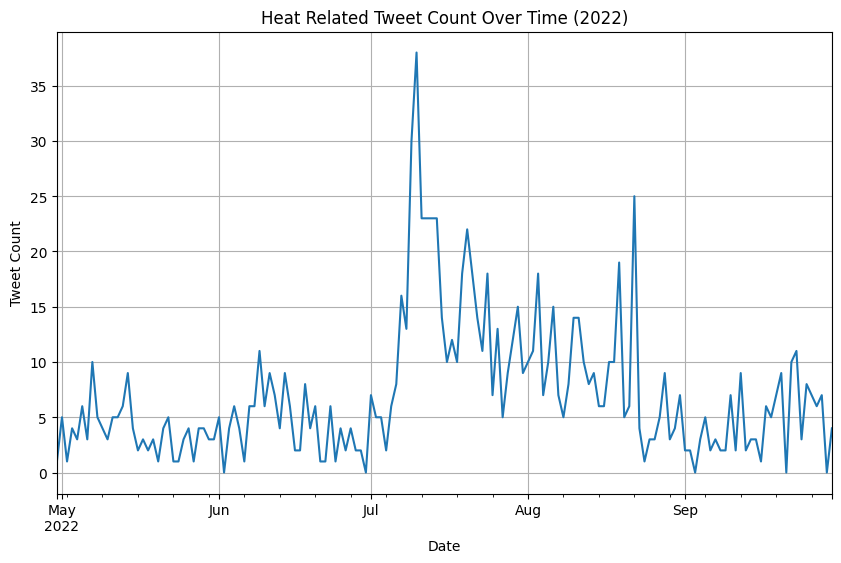

In [69]:
year1_tweets = tweets[tweets["year"] == 2022]
tweet_count_1 = year1_tweets.resample('D').size()




fig, ax = plt.subplots(figsize=(10, 6))
tweet_count_1.plot(ax=ax)
ax.set_title('Heat Related Tweet Count Over Time (2022)')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet Count')
ax.grid(True)
plt.show()

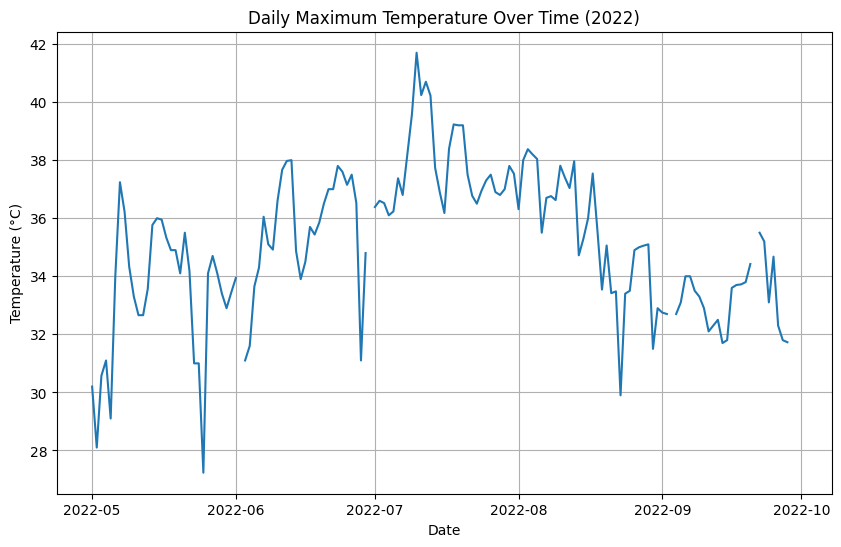

In [76]:
avg_max_temp_by_day = year1_tweets['T_DAILY_MAX'].resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_max_temp_by_day.index, avg_max_temp_by_day, linestyle='-')
plt.title('Daily Maximum Temperature Over Time (2022)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

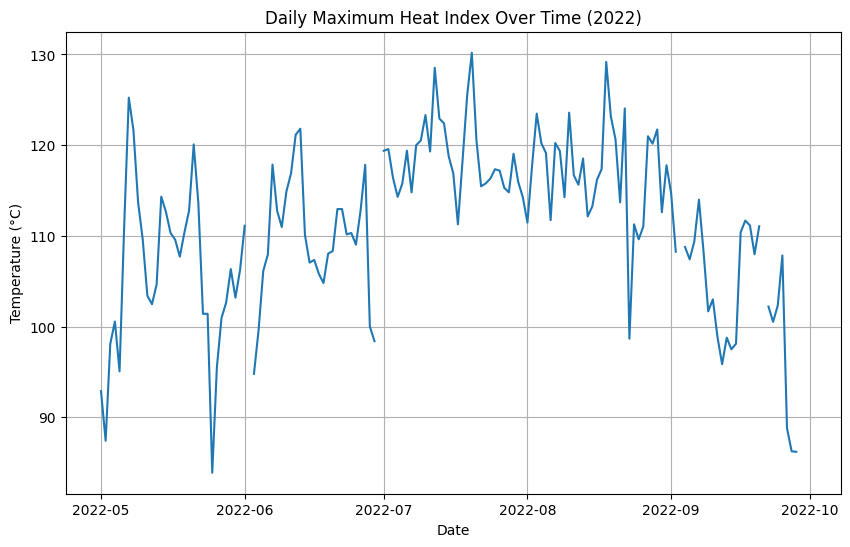

In [77]:
avg_max_HI_by_day = year1_tweets['HI_Max_f'].resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_max_HI_by_day.index, avg_max_HI_by_day, linestyle='-')
plt.title('Daily Maximum Heat Index Over Time (2022)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

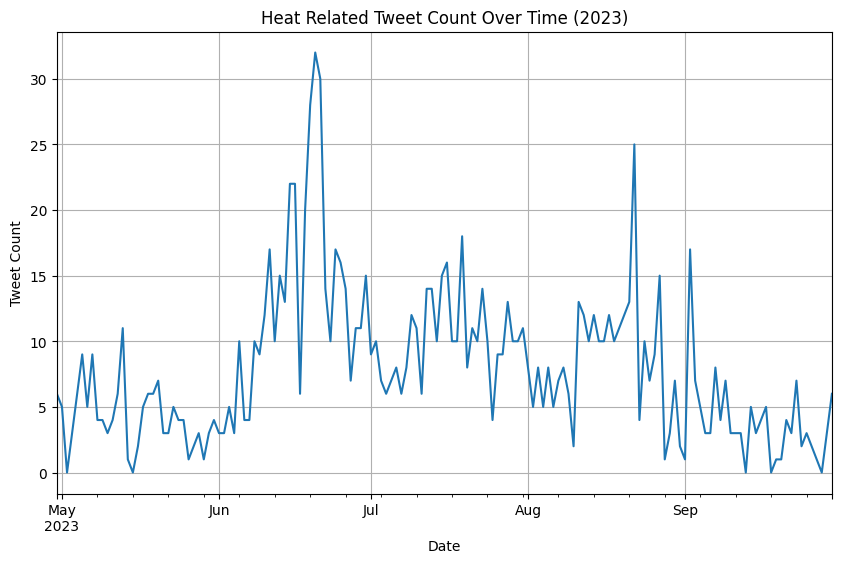

In [79]:
year2_tweets = tweets[tweets["year"] == 2023]
positive_tweets_2 = year2_tweets['VADAR_sentiment'] >= threshold
negative_tweets_2 = year2_tweets['VADAR_sentiment'] <= (-1.0 * threshold)
tweet_count_2 = year1_tweets.resample('D').size()

fig, ax = plt.subplots(figsize=(10, 6))
tweet_count_1.plot(ax=ax)
ax.set_title('Heat Related Tweet Count Over Time (2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Tweet Count')
ax.grid(True)
plt.show()

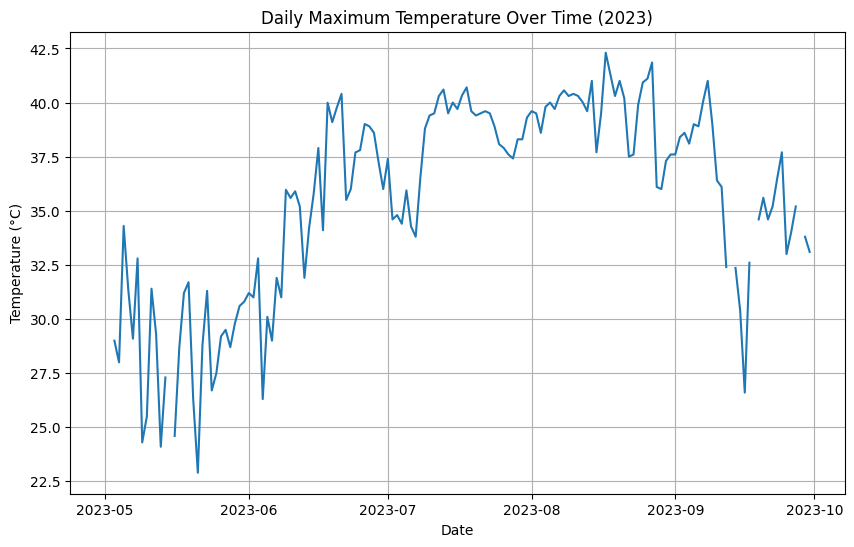

In [81]:


avg_max_temp_by_day_2 = year2_tweets['T_DAILY_MAX'].resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_max_temp_by_day_2.index, avg_max_temp_by_day_2, linestyle='-')
plt.title('Daily Maximum Temperature Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

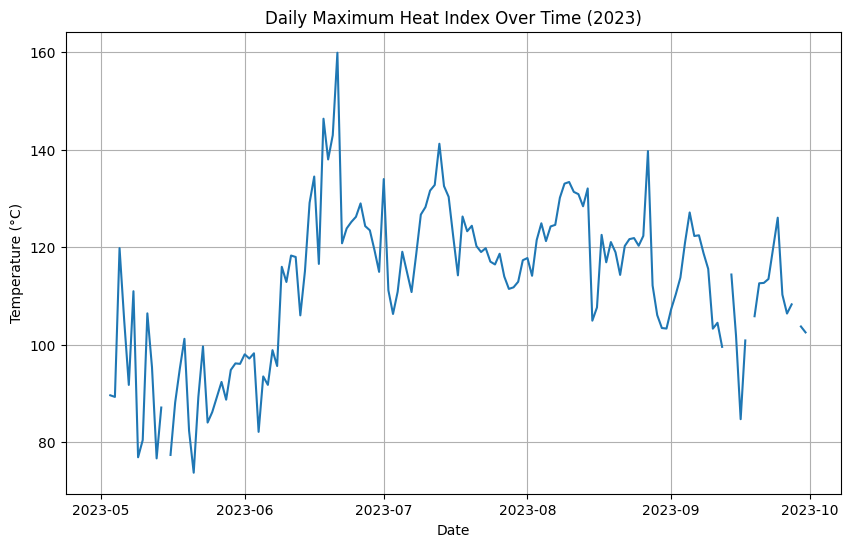

In [80]:
avg_max_HI_by_day_2 = year2_tweets['HI_Max_f'].resample('D').mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_max_HI_by_day_2.index, avg_max_HI_by_day_2, linestyle='-')
plt.title('Daily Maximum Heat Index Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

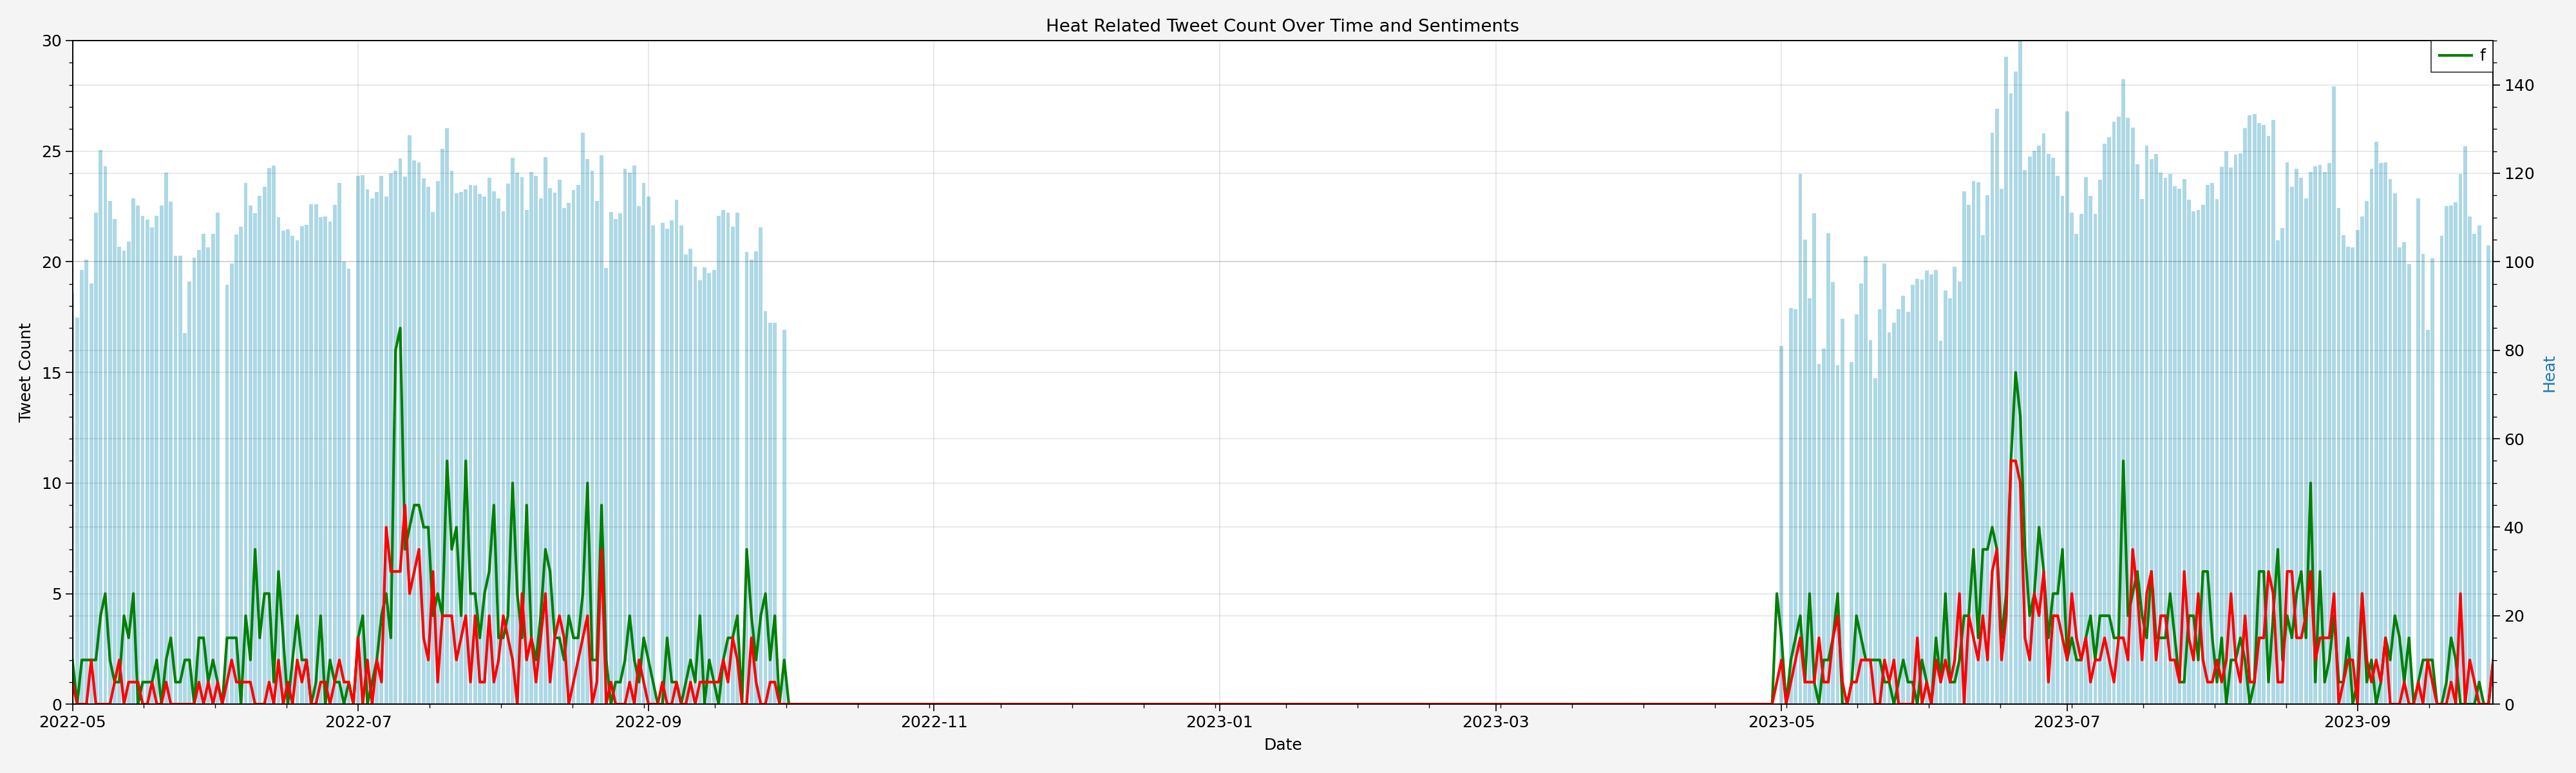

In [272]:
import datetime as datetime

threshold = 0.05
positive_tweets_1 = tweets[tweets['VADAR_sentiment'] >= threshold]
negative_tweets_1 = tweets[tweets['VADAR_sentiment'] <= (-threshold)]

pos_tweet_count_1 = positive_tweets_1.resample('D').size()
neg_tweet_count_1 = negative_tweets_1.resample('D').size()

fig, ax2 = plt.subplots(figsize=(20, 6))



ax2.set_xlim(
            datetime.datetime(2022, 5, 1),
            datetime.datetime(2023, 9, 30),
     
    )
ax = ax2.twinx()
# plt.bar(tweets['Date'], tweets['Values'])
ax2.set_ylabel('Heat', color='tab:blue')
ax2.set_ylim(0, 150)
ax.set_ylim(0, 30)

# ax2.set_axis_off()
# avg_max_HI_by_day.set_zorder(-1)
# ax2.plot()
# avg_max_HI_by_day = tweets['HI_Max_f'].resample('D').mean()
# avg_max_HI_by_day.plot.bar(ax=ax2)
# print(avg_max_HI_by_day)
ax2.bar(avg_max_HI_by_day.index, avg_max_HI_by_day, color='lightblue')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
# ax2.xaxis.date
# ax2.set_zorder(10)
# ax2.set_zorder(-1)

ax.plot(pos_tweet_count_1.index, pos_tweet_count_1, color='green', label='Positive Tweets')
ax.plot(neg_tweet_count_1.index, neg_tweet_count_1, color='red', label='Negative Tweets')

ax.yaxis.tick_left()
ax.yaxis.set_label_position("left")

# pos_tweet_count_1.plot(ax=ax, label='Positive Tweets')
# neg_tweet_count_1.plot(ax=ax, label='Negative Tweets')
# ax.set_zorder(20)




ax.set_title('Heat Related Tweet Count Over Time and Sentiments')
ax2.set_xlabel('Date')
ax.set_ylabel('Tweet Count')
# ax.set_axis_off()
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

In [133]:

import proplot as plot
import pandas as pd

# Assuming you have already defined the data for both years

# Threshold for sentiment
threshold = 0.05

# Positive and negative tweets for year 1
positive_tweets_1 = year1_tweets[year1_tweets['VADAR_sentiment'] >= threshold]
negative_tweets_1 = year1_tweets[year1_tweets['VADAR_sentiment'] <= (-threshold)]

pos_tweet_count_1 = positive_tweets_1.resample('D').size()
neg_tweet_count_1 = negative_tweets_1.resample('D').size()

# Positive and negative tweets for year 2
positive_tweets_2 = year2_tweets[year2_tweets['VADAR_sentiment'] >= threshold]
negative_tweets_2 = year2_tweets[year2_tweets['VADAR_sentiment'] <= (-threshold)]

pos_tweet_count_2 = positive_tweets_2.resample('D').size()
neg_tweet_count_2 = negative_tweets_2.resample('D').size()

# Plotting
fig, ax = plot.subplots(figsize=(10, 6))

# Plotting data for year 1
ax.plot(pos_tweet_count_1, label='Positive Tweets (2022)')
ax.plot(neg_tweet_count_1, label='Negative Tweets (2022)')

# Plotting data for year 2 with 'jump' feature
ax.plot(pos_tweet_count_2, label='Positive Tweets (2023)', linestyle='--', jump=True)
ax.plot(neg_tweet_count_2, label='Negative Tweets (2023)', linestyle='--', jump=True)

ax.format(title='Heat Related Tweet Count Over Time and Sentiments', ylabel='Tweet Count', grid=True, legend=True)

plt.show()


AttributeError: module 'matplotlib.cm' has no attribute 'cmap_d'

AttributeError: 'function' object has no attribute 'bar'

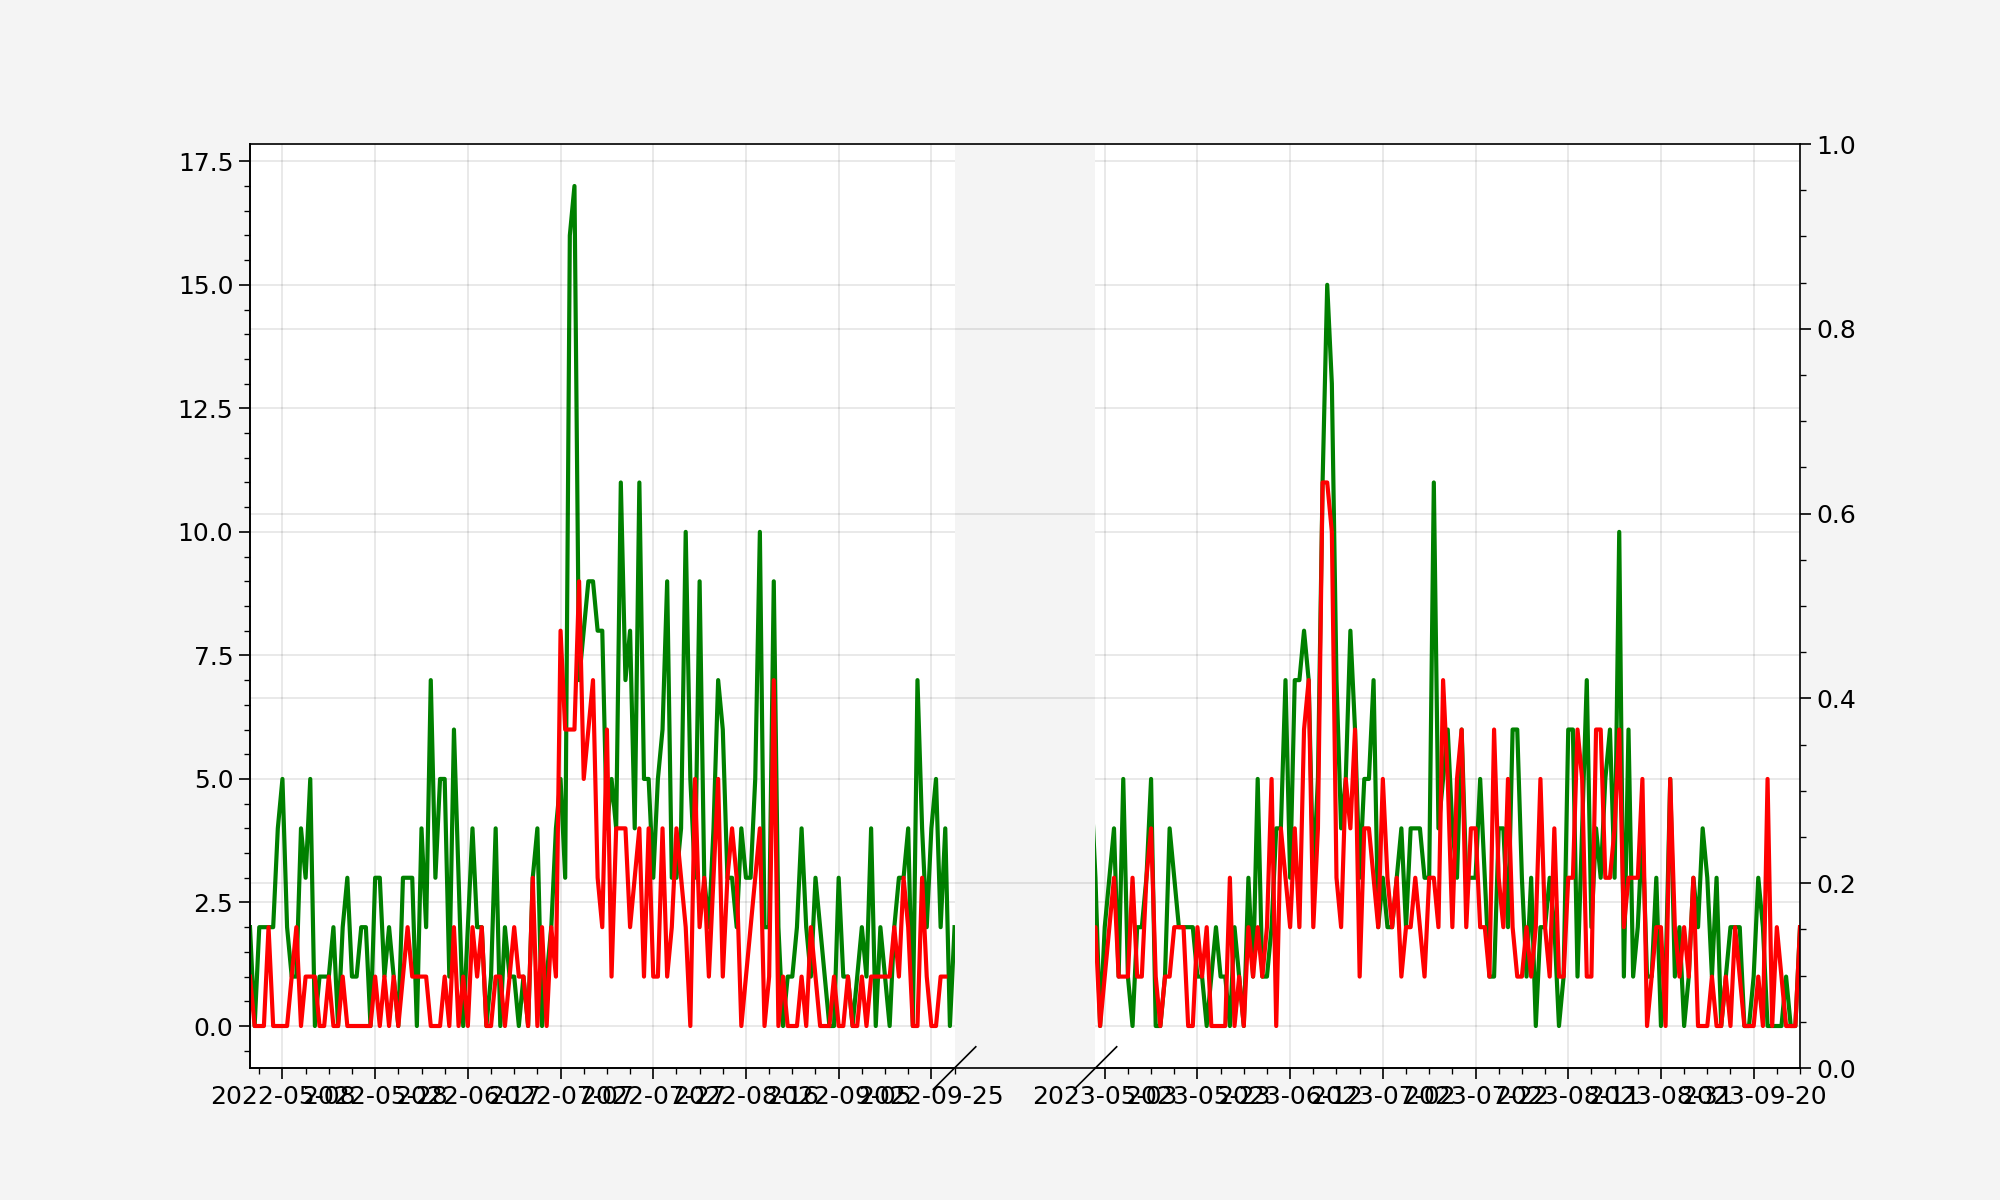

In [219]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as datetime
from brokenaxes import brokenaxes


# Assuming you have already defined the data for both years

# Threshold for sentiment
threshold = 0.05

# Positive and negative tweets for year 1
positive_tweets_1 = year1_tweets[year1_tweets['VADAR_sentiment'] >= threshold]
negative_tweets_1 = year1_tweets[year1_tweets['VADAR_sentiment'] <= (-threshold)]

pos_tweet_count_1 = positive_tweets_1.resample('D').size()
neg_tweet_count_1 = negative_tweets_1.resample('D').size()

# Positive and negative tweets for year 2
positive_tweets_2 = year2_tweets[year2_tweets['VADAR_sentiment'] >= threshold]
negative_tweets_2 = year2_tweets[year2_tweets['VADAR_sentiment'] <= (-threshold)]

pos_tweet_count_2 = positive_tweets_2.resample('D').size()
neg_tweet_count_2 = negative_tweets_2.resample('D').size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# ax.remove()
# ax.
# ax.ticklabel_format()
ax.minorticks_off()
ax.set_axis_off()
ax.grid(False)



# Plotting data for year 1
# pos_tweet_count_1.plot(ax=ax, label='Positive Tweets (2022)')
# neg_tweet_count_1.plot(ax=ax, label='Negative Tweets (2022)')

# Plotting data for year 2
# pos_tweet_count_2.plot(ax=ax, label='Positive Tweets (2023)', linestyle='--')
# neg_tweet_count_2.plot(ax=ax, label='Negative Tweets (2023)', linestyle='--')

# ax.set_title('Heat Related Tweet Count Over Time and Sentiments')
# ax.set_ylabel('Tweet Count')
# ax.grid(True)
# ax.legend()

bax = brokenaxes(
    xlims=(
        (
            datetime.datetime(2022, 5, 1),
            datetime.datetime(2022, 9, 30),
        ),
        (
            datetime.datetime(2023, 5, 1),
            datetime.datetime(2023, 9, 30),
        )
    )
)

bax.plot(pos_tweet_count_1, 'g-', label='Positive Tweets')
bax.plot(neg_tweet_count_1, 'r-', label='Negative Tweets')
bax.plot(pos_tweet_count_2, 'g-')
bax.plot(neg_tweet_count_2, 'r-')
ax2 = ax.twinx()
avg_max_HI_by_day_2 = year2_tweets['HI_Max_f'].resample('D').mean()
plt.plot.bar(avg_max_HI_by_day_2.index, avg_max_HI_by_day_2, ax=ax2)
# bax.plot()
bax.set_title('Heat Related Tweet Count Over Time and Sentiments')
bax.set_ylabel('Tweet Count')

# bax.secondary_xaxis("top")
# # bax.set_xlabel()
# bax.grid(True)
bax.legend()


fig.autofmt_xdate()
[x.remove() for x in bax.diag_handles]
bax.draw_diags()

import matplotlib.dates as mdates
import matplotlib.dates as dates

for ax in bax.axs:
    # print(ax.xaxis.)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%b'))
    
    ax.xaxis.set_major_formatter(dates.DateFormatter("%b, %Y"))

    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%b'))
    
    # ax.xaxis.set_minor_formatter(dates.DateFormatter("%m-%Y"))

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# bax.plot(pos_tweet_count_1, pos_tweet_count_2[0:153])

# fig.autofmt_xdate()
# [x.remove() for x in bax.diag_handles]
# bax.draw_diags()

# import matplotlib.dates as mdates
# for ax in bax.axs:
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))

# # Finding common x-axis limits
# x_min = min(pos_tweet_count_1.index.min(), pos_tweet_count_2.index.min())
# x_max = max(pos_tweet_count_1.index.max(), pos_tweet_count_2.index.max())
# ax.set_xlim(x_min, x_max)

# # Customizing x-axis ticks to show every month


# # Manually setting ticks to include the last date of 2022 and the first date of 2023
# last_date_2022 = pd.Timestamp('2022-12-31')
# first_date_2023 = pd.Timestamp('2023-01-01')

# # Get current ticks and add the last date of 2022 and the first date of 2023
# ticks = ax.get_xticks().tolist()
# print(ticks)
# ticks.remove(19358.0)
# ticks.extend([last_date_2022, first_date_2023])

# ax.set_xticks(ticks)

# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# bax.plot(ax)
# plt.show()


In [87]:
from scipy.stats import pearsonr

tweets_clean = tweets.dropna(subset=['T_DAILY_MAX', 'HI_Max_f', 'VADAR_sentiment'])
correlation_temp, pvalue_temp = pearsonr(tweets_clean['T_DAILY_MAX'], tweets_clean['VADAR_sentiment'])

correlation_heat, pvalue_heat = pearsonr(tweets_clean['HI_Max_f'], tweets_clean['VADAR_sentiment'])

print("Correlation between Max Temperature and Compound Sentiment Score:", correlation_temp)
print("P-value for Max Temperature:", pvalue_temp)
print("Correlation between Max Heat Index and Compound Sentiment Score:", correlation_heat)
print("P-value for Max Heat Index:", pvalue_heat)


Correlation between Max Temperature and Compound Sentiment Score: -0.05777851057236196
P-value for Max Temperature: 0.005606333455721412
Correlation between Max Heat Index and Compound Sentiment Score: -0.05581676929878506
P-value for Max Heat Index: 0.007455961949348352
